# Analysis On House Sales in USA

* This project contains dataset of house sale prices for USA. 
* It includes homes sold between May 2019 and May 2020. Goal to determine the market price of a house given a set of features.
* Analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.


**Creator** : Anandan Raju



**Machine Learning Models used in this Project** 

1. Linear Regression
2. Ridge Regression

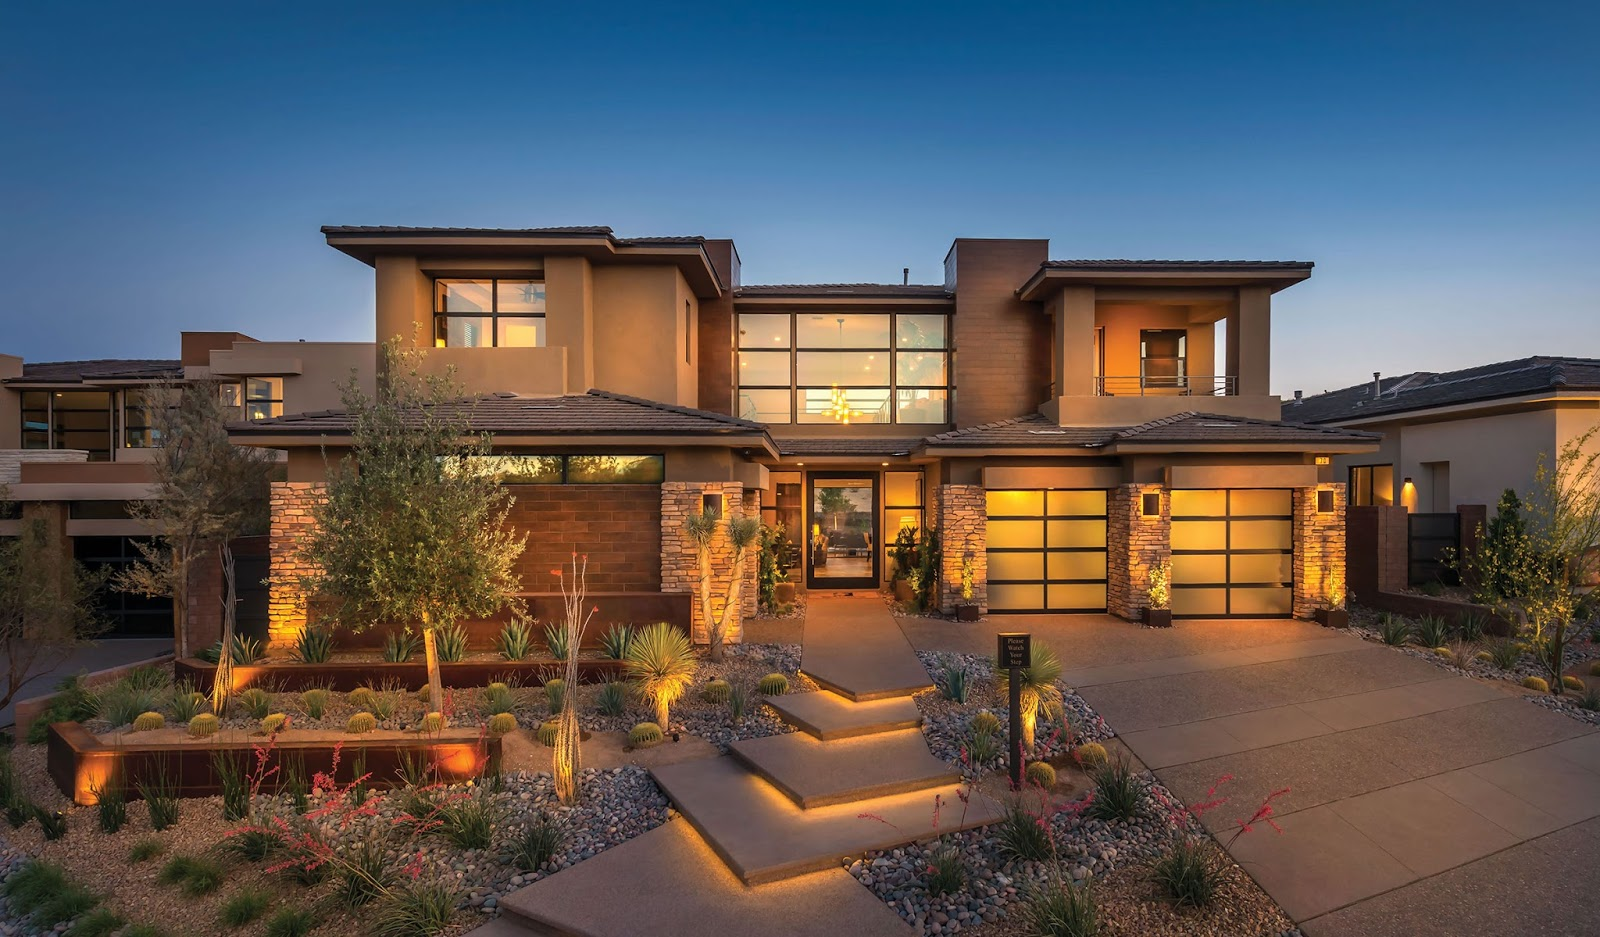

**Synopsis**

1. Import Packages
2. Reading DataSet
3. Checking Null Count and DataType
4. Exploring DataSet
5. Data Preprocessing
    * 5.1 Setting X and Y variables
    * 5.2 Transform Date Column
    * 5.3 Splitting DataSet
6. Models\
    * 6.1 Linear Regression
      - 6.1.1 R2 Score & Fit Percentage
    * 6.2 Feature Scaling (LR with Normalisation)
      - 6.2.1 R2 Score & Fit Percentage
    * 6.3 Ridge Regression
      - 6.3.1 R2 Score & Fit Percentage
7. Model Comparison

**1. Import Packages**

a) Scientific Computing Libraries

In [1]:
import numpy as np
import pandas as pd

b) Visualisation Libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c) Algorithmic Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

d) Others Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

**2. Reading DataSet**

In [22]:
house=pd.read_csv('usa_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20191013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20191209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20200225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20191209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20200218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**3. Checking Null Count & Data Type**

In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
house.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**4. Exploring DataSet**

In [27]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
house_corr=house.corr()
house_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


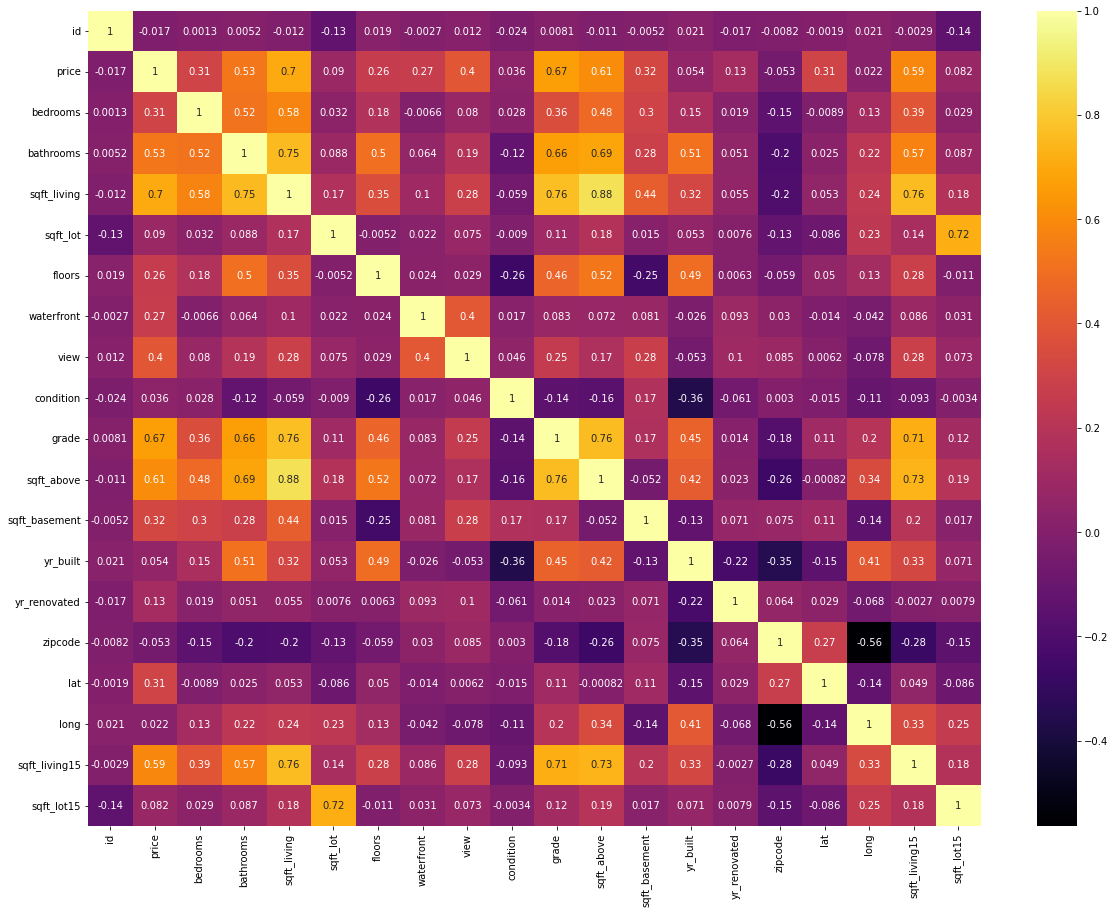

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(house_corr,annot=True,cmap='inferno')
plt.show()

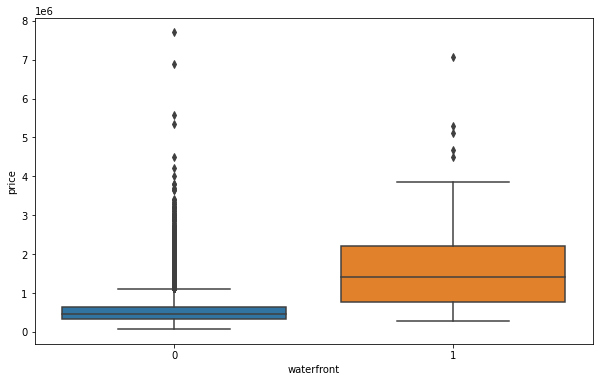

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront',y='price',data=house)
plt.show()

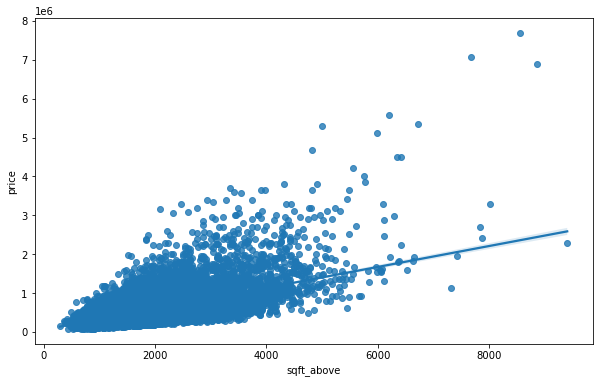

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='sqft_above',y='price',data=house)
plt.show()

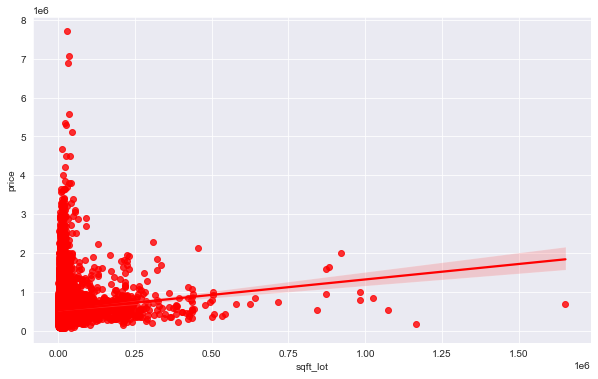

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(x='sqft_lot',y='price',data=house,color='red')
plt.show()

**5. Data Preprocessing**

**5.1 Setting X and Y variables**

In [32]:
drop1=house.drop(['id'],axis=1)
drop2=drop1.drop(['price'],axis=1)
x=drop2
x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20191013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20191209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20200225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20191209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20200218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20190521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20200223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20190623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20200116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [33]:
y=house['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

**5.2 Transform Date Column**

* Because "Date" column as values of unsupported format to do further analysis

In [34]:
x['date']=pd.to_datetime(x['date'])
x['year']=x['date'].dt.year
x['month']=x['date'].dt.month
x['day']=x['date'].dt.day
x=x.drop('date',axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,2019,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,2019,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,2020,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,2019,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,2020,2,18


**5.3 Splitting DataSet**

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.75,shuffle=True)

# To find the train size, test size and total size
print('Train Size = {} \nTest Size = {} \nTotal Size = {}'.format(x_train.shape[0],x_test.shape[0],x.shape[0]))

Train Size = 16209 
Test Size = 5404 
Total Size = 21613


**6. Models**

**6.1 Linear Regression**

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=False)
model.fit(x_train,y_train)

LinearRegression(normalize=False)

In [37]:
x=house[['long']]
y=house['price']
lm=LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.00046529904344994044

In [38]:
x=house[['sqft_living']]
y=house.price
lm=LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.49286538652201417

In [39]:
features=features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x=house[features]
y=house.price
lm=LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.6577014125358545

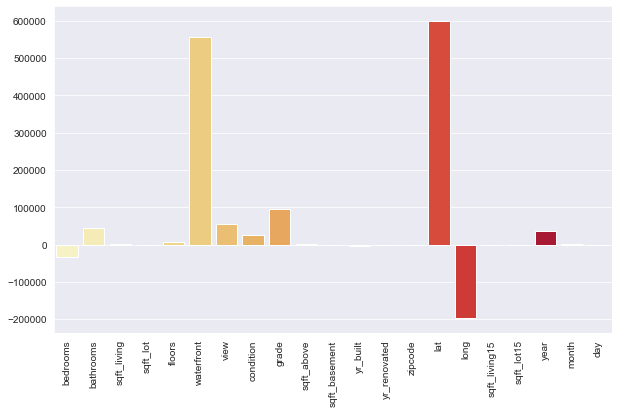

In [61]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=x_train.columns,y=model.coef_,palette='YlOrRd')
plt.xticks(rotation=90);

**6.1.1 R2 Score & Fit Percentage**

In [41]:
print("Linear Regression r2 Score",r2_score(y_test,y_pred_test))
print("Fit Percentage",(r2_score(y_test,y_pred_test)*100).round(2),"%")

Linear Regression r2 Score 0.7061677748423442
Fit Percentage 70.62 %


**6.2 Feature Scaling (LR with Normalisation)**

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scale=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_scale=pd.DataFrame(sc.fit_transform(x_test),columns=x_test.columns)

In [43]:
x_train_scale.mean().to_frame()

,0
bedrooms,-1.651738e-16
bathrooms,-1.671259e-16
sqft_living,5.904203e-17
sqft_lot,4.964804e-17
floors,-1.526805e-16
waterfront,-1.799626e-15
view,1.946606e-17
condition,3.419369e-16
grade,-5.164945e-16
sqft_above,1.500024e-16


In [44]:
x_test.mean().to_frame()

,0
bedrooms,3.379904
bathrooms,2.119865
sqft_living,2099.771466
sqft_lot,15824.717987
floors,1.480755
waterfront,0.009252
view,0.234456
condition,3.414138
grade,7.668579
sqft_above,1799.297557


In [45]:
model_norm=LinearRegression()
model_norm.fit(x_train_scale,y_train)

LinearRegression()

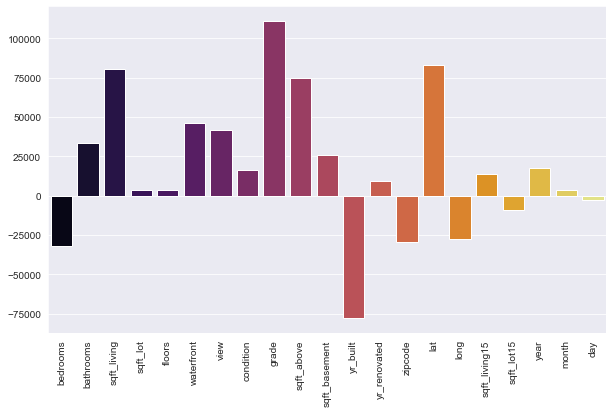

In [58]:
y_pred_train=model_norm.predict(x_train_scale)
y_pred_test=model_norm.predict(x_test_scale)

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=x_train_scale.columns,y=model_norm.coef_,palette='inferno')
plt.xticks(rotation=90);

**6.2.1 R2 Score & Fit Percentage**

In [47]:
print("Linear Regression r2 Score",r2_score(y_test,y_pred_test))
print("Fit Percentage",(r2_score(y_test,y_pred_test)*100).round(2),"%")

Linear Regression r2 Score 0.7029222221549587
Fit Percentage 70.29 %


**6.3 Ridge Regression**

In [48]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.5)
rr.fit(x_train_scale,y_train)

Ridge(alpha=0.5)

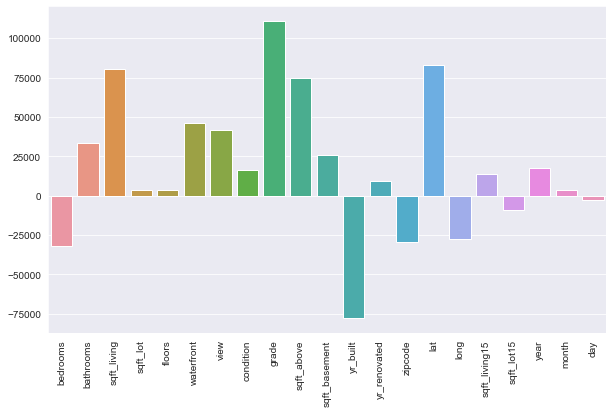

In [56]:
y_pred_train=rr.predict(x_train_scale)
y_pred_test=rr.predict(x_test_scale)

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=x_train_scale.columns,y=rr.coef_)
plt.xticks(rotation=90);

**6.3.1 R2 Score & Fit Percentage**

In [50]:
print('Ridge Regression r2 Score:',r2_score(y_test,y_pred_test))
print("Fit Percentage",(r2_score(y_test,y_pred_test)*100).round(2),"%")

Ridge Regression r2 Score: 0.7029208324984104
Fit Percentage 70.29 %


**7. Model Comparison**

In [51]:
cmp = pd.DataFrame({'Model/Experiments': ["Linear Regression", "Feature Scaling (LR w/ Normalization)","Ridge Regression"], 
                        'R2 Score': [0.7061708994556015, 0.7029175214328387, 0.7029161301699458],'Fit Percentage':[70.62,70.29,70.29]})
cmp.sort_values(by='R2 Score', ascending=False)

,Model/Experiments,R2 Score,Fit Percentage
0,Linear Regression,0.706171,70.62
1,Feature Scaling (LR w/ Normalization),0.702918,70.29
2,Ridge Regression,0.702916,70.29
